# Your 1st ML model: k Nearest Neighbours Classification with the IRIS dataset

<hr style="border:2px solid gray">
<a name="preliminaries"></a>

## Preliminaries: Recommended Books [^](#outline)

There are three books recommended books:

1) [The One Hundred-Page Machine Learning Book](http://themlbook.com/) by 
Andriy Burkov. 
- This is a great conceptual book on ML, with a reasonable summary of the mathematics. This book is free to try before you buy (a great idea).

**then two O'REILLY books:**

2) [Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron. 
- A great hands-on book for ML to take you from no knowledge to implementing models, and has sufficient detail to take you into the understanding of the algorithms. This book also has a good collection of the original papers cited and links to them on their website. There is also much information on the [github](https://homl.info). An online version can be accessed through the college library, if you search it by name through the library website. **If there was a textbook for this course, this would be it.** 

3) [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/). This is a more introductory level than one above, however it is really well written and takes you through things more carefully.

There are plenty of other good more theoretical ML books but the above are practical, but still having enough theory for you to understand them. In this course we only have time to teach you the basics and to touch on a few techniques. These books will take you further.

**Note:** examples from the last two of these books will be used throughout these workbooks (on publically available data) and will be referenced appropriately. **2.** will be denoted with {homl} and **3.** as {imlp}. 
* When "#not shown" is written this means it is not shown in either of these two books. 

<hr style="border:2px solid gray">
<a name="section-1"></a>

## Section One: Introduction to Machine Learning [^](#outline)

In machine learning you build a model from the data that you have. There are many different sorts of machine learning and there are many different ways of categorising them.

### Supervised, Unsupervised and Reinforcement Learning

**Supervised learning** builds a model using data with a **desired output** (called labels) where we want to predict the outcome for new observations of the input. Most of the machine learning that we carry out in the physical sciences (and the world at large) is supervised. The historical data is called **training data** and is used to train the model. 
* **Examples** are: sorting emails to know which ones are spam (classification), autocorrect, predictive analytics, object detection, such as facial recognition, predicting the price of a car (regression) etc. 

**Unsupervised learning** is where you **don't have a desired output**, aka where the training data is unlabeled, so you are trying to build a model based on other properties. We find patterns based on similarities or differences of data points. Some common examples are trying to gain intuition of high-dimensional data, social network friend suggestions via the frequency of connections between friends etc.
* Examples are: **clustering** the data into categories without us knowing the two categories or how the input data relates to one another. 

**Semisupervised learning** sits somewhere between supervised and unsupervised learning, where you have algorithms that cope with partially labelled data. Often the labelled data points are used to infer labels for the unlabelled data points, and the combined labelled dataset is used to train a complete model for prediction on new data.

**Reinforcement learning** is somewhat different in that it has **agents** that **perform a (sometimes complex) series of tasks** and learn to do the tasks well through a series of **trial and error**. If you have ever played a game against a ML based computer, then this is almost certainly how it was trained.

For the rest of this course, we will restrict ourselves to just discussing supervised and unsupervised learning, with the main emphasis on supervised methods. However, an awareness of of semi-supervised and reinforcement techniques is useful for general understanding.

<div style="background-color: #FFF8C6">

### Mathematical Description of Supervised Vs. Unsupervised

Inputs belong to an input space $x^{(i)} \in X$. For example, if you have $p$ *different* continous **features** for each data point then $x^{(i)} \in \mathbb{R}^{p}$. In the case where $p>1$, we call our data *multivariate*. **Note:** input features are not necessarily numerical e.g. gender, name, etc. 

If you are dealing with **supervised learning** then there will be **outputs** in an output space $y^{(i)} \in Y$, which can be continous or categorical: which is a number or some feature/group. For a given task we are trying to find a function $f:X \rightarrow Y$, so that $f(x^{(i)})$ is a "good" **predictor** for $y^{(i)}$. The definition of good will depend on the algorithm used. In general, the quality of prediction is determined by comparing $f(x^{(i)})$ and $y^{(i)}$. 

For **unsupervised learning** there is no labelled output variable to predict. Instead, the algorithm attempts to learn causal relationships between the the features in the training data. Additional effort is required to interpret the patterns extracted. 

We are trying to link the **predictors** to the **outputs** to make new predictions on a new dataset.

### Classification and Regression

The two main uses of ML in the physical sciences are classification and regression in supervised ML. 

In **classification** you are trying to **distinguish between types of entities**. For example pictures of cats from dogs, spam emails,  clothes types, the energy deposits left by electron versus muons in a detector etc. Classification problems are often binary $y\in \{0,1\}$, however there are generalisations to multiple-class cases. 

![homl_classification2.png](attachment:homl_classification2.png)

*A labeled training set for supervised learning, spam classification. Many example emails and class (Spam or not) are used to train the ML algorithm, and it is then used to classify new emails (Source: {homl} 1-5).*

In **regression** you are trying to predict **what a value will be**. For example the return on an investment, energy of a cosmic ray based on observation of scintillation light and the muons that it produced etc. Simply, classification tells you what it is whereas regression tells you what value it has.

![homl_regression2.png](attachment:homl_regression2.png)

*Regression example, with a single feature, predicting what the new instances value will be given the training set (Source: {homl} 1-6).*

**Note:** While these sound conceptually different the same approaches can often be used for both as you will.

### Instance-based and Model-based Learning

The purpose of ML is to be able to take the data that you have and generalise it to new data. 

For **instance-based learning**, predictions are calculated by looking at the test data that you have and in some way say that it is (either in classification or regression) the same as the "nearest" (calculated in some way) data that you already have to it. 
* Common examples of these algorithms are k-Nearest Neighbours (discussed below), kernel machines, etc.

In **model-based learning** you take a few instances and build a more general **model**. This model is refined through training and validation. Model-based ML models often have internal parameters that are not seen in the outside world - these are called **hyperparameters**.
* Examples of such an approach include decision trees and neural networks, both of which are covered later in this course

![homl_modelbased2.png](attachment:homl_modelbased2.png)

*Model-based learning example, depicting how a new instance would be classified given a model built from known training data (Source: {homl} 1-16).*

## Challenges in ML
In preparing ML models, we can face a number of challenges that can reduce the performance. These are outlined below.

### Insuficient Training Data

**Training data** is the dataset we use for our ML model to learn. Often datasets of **thousands of events** are required to build a reasonable model. There are various methods to **lower the amount of data you need**, for example by making your **datasets as simple as possible** -- but **not enough data** results in **poor ML** model.

### Unrepresentative (Biased) Training Data

If there is a **systematic bias** in your training data then your model will **not generalise well** and will **produce wrong results**. Sampling bias can be very dangerous for your ML model. A systematic bias is a result of how the data is collected, examples being the zero error, background noise, poor thermal contact between the thermometer and the substance whose temperature is to be found, solar radiation because trees or buildings shade the radiometer, etc. Some form of **regularisation** can be used to mitigate this to some extent (see below in section three).

### Poor Quality Data

If your data is **noisy** with a lot of **errors and outliers**, then your model is going to be unreliable. 

There may be **missing fields** (e.g. one of your instruments is not working that day), at which point you need to decide what to do about the **missing data**. There are a variety of approaches, but two common ones are to **set the missing fields**  to the **median value** so that it should have **very little influence** or do the opposite and to set it to a **value far outside the normal range** so that the **model learns not to use it**. There are pros and cons to both.

### Irrelevant Features

If there is a lot of **irrelevant data** it can sometimes **swamp the model** and mean that the **relevant information fields are lost**. An important part of ML is coming up with **appropriate** and **good set of features**; sometimes called *feature engineering*. This can involve selecting only the most **important data features** or **combining features** into new, more appropriate features. For example if you have a feature that is only a function of $r$, where $r=\sqrt{x^2+y^2}$ it is better to use $r$ than $x$ and $y$ separately.

### Overfitting the Training Data

This is when your **model is more complex** than the data you have can easily train.

![homl_overfitting.png](attachment:homl_overfitting.png)

*Example of an ML model overfitting to the training data due to fitting a very high-degree polynomial (Source: {homl} 1-22).*

We came across something similar with minuit. In general you should **keep your model as simple as possible** to fit the data well.

### Underfitting

This is the opposite of overfitting and is when your model is too simple to fit the data that you have, missing the underlying structure of the data. For example if you are trying to fit your data with a linear model but really the data form a parabolic distribution.

### Resolution: Testing and Validating

The only way to know if your model has generalised well is to **validate it on data**. The normal way to do this is to separate your data into **training data** and **testing data**. You use the **training data** to **train your model** and the **testing data** to test **how well it has generalised**. If there is a **large difference in the performance of the model** on the training data compared to the performance on the testing data it shows that your **model has been overtrained** and is **picking out features that are specific to your training data**. 

**Note:** *What fraction of your data should you use to train and what fraction to test?* There is no single answer to this question, but in most cases it tupically around 70:30 or 80:20 training:testing.

### Summary

This section has introduced some of the key fundamentals of machine learning, including:
 * Supervised vs unsupervised learning
 * Classification and regression
 * Instance-based and model-based learning

The remainder of this workbook is concerned with classification, using the k-Nearest Neighbours and Support Vector Machine algorithms. The same dataset will be used for both analyses and is outlined in the following section.

<hr style="border:2px solid gray">
<a name="section-2"></a>

## Section Two: The IRIS dataset [^](#outline)

For the remainder of this workbook, we will be using one of the most famous datasets in machine learning. First published outside of the context of ML in 1936, this dataset describes three different types of iris flowers (*versicolor*, *setosa* and *virginica*) based on four different metrics: petal length, petal width, sepal length and sepal width. A photograph illustrating these features can be seen in the figure below.

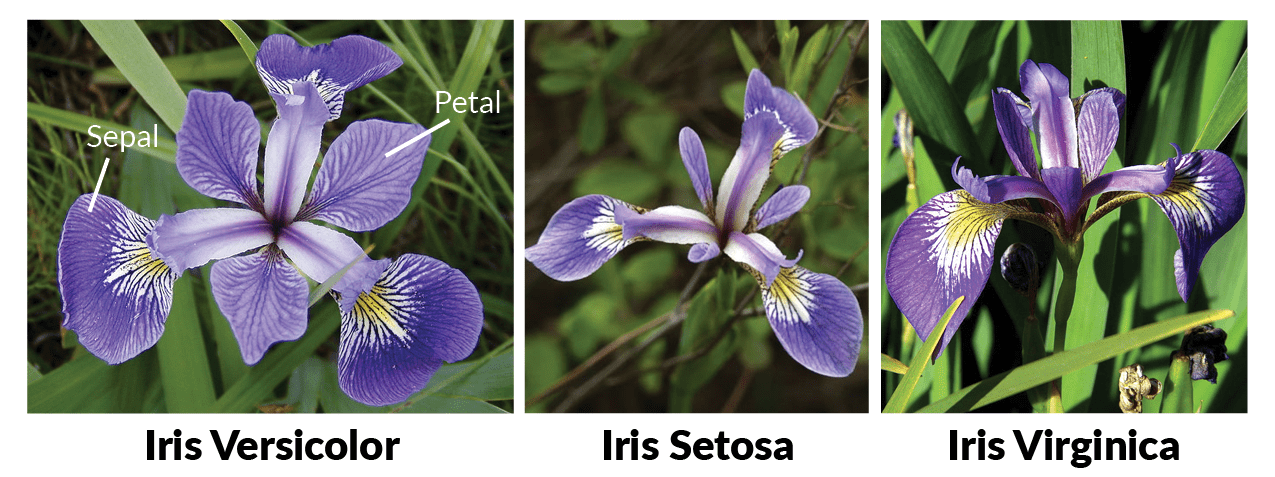

*Different kinds of iris used in the IRIS dataset, with the petal and sepal labelled on the iris versicolor ([source](https://www.datacamp.com/tutorial/machine-learning-in-r)).*

Further details about this dataset can be found online, e.g. on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) and in the [original paper](https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x). This dataset is commonly used for testing new classification algorithms and just generally is widely applied, although the dataset itself is quite small. It is sufficiently popular that it is built into a lot of different machine learning codebases, including Scikit-Learn. It is easy to import:

In [15]:
import numpy as np
import scipy as sp 
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
display(iris) #Outputs iris in a nice format

<class 'sklearn.utils._bunch.Bunch'>


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The loaded IRIS dataset is contained within a dictionary. We can list the keys of the dictionary to see what is contained within the data:

In [16]:
print(iris.keys()) #.keys() return the keys of the dictionary as a list

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Each of these is as follows:
 * data : the input data, i.e. the sepal length, sepal width, petal length and petal width. This is arranged as an array of shape (N_samples, N_features).
 * target : the target data, encoded numerically. This is an array of integers, either 0, 1, or 2, corresponding to the type of iris of the data point. 
 * frame : if the *as_frame* argument is passed as True to *load_iris*, contains a DataFrame of the IRIS data.
 * target_names : list of the target names, i.e. *setosa*, *versicolor*, and *virginica*. 

In [17]:
print(iris['DESCR']) #Description of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

You can see that each data entry has four values; sepal length, sepal width, petal length and petal width. The target/output is an integer from 0 to 2 corresponding to the three different forms of iris.

## Building the Model

Lets start by building a very simple model. We used the kNN algorithm in regression and we will start off with this now in classification (don't forget we need to split into training and testing).

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)  

In [5]:
print(y_train) #Sanity check that all is well (the outputs are between 0 to 2)

[1 2 1 1 2 1 0 0 0 2 0 0 1 0 2 2 1 1 1 2 1 1 0 2 2 1 0 0 0 1 1 0 2 0 0 0 0
 0 2 1 1 1 0 0 1 2 0 1 1 0 0 1 2 1 0 2 1 2 1 0 2 2 0 1 0 1 2 0 0 0 2 2 2 1
 2 0 0 1 2 2 1 0 0 2 1 0 2 1 0 0 1 1 2 0 1 1 0 0 1 1 1 1 2 2 0 2 0 1 0 2 2
 2 2 2 0 2 1 0 2 1]


It is always important to visualize your data, to look for obvious discriminators or strong correlations. One useful and easy way to do this is using a Pandas scatter matrix. This produces an array of plots, comparing each column of the Pandas DataFrame used to generate the plot. The leading diagonal of plots can be chosen either to be a histogram of the feature, or an estimate of the probability density function for that feature known as a **kernel density estimate**. Remaining plots in the array are scatter plots of each combination of input features. This allows us to see any correlation or easy discriminators between different input features.

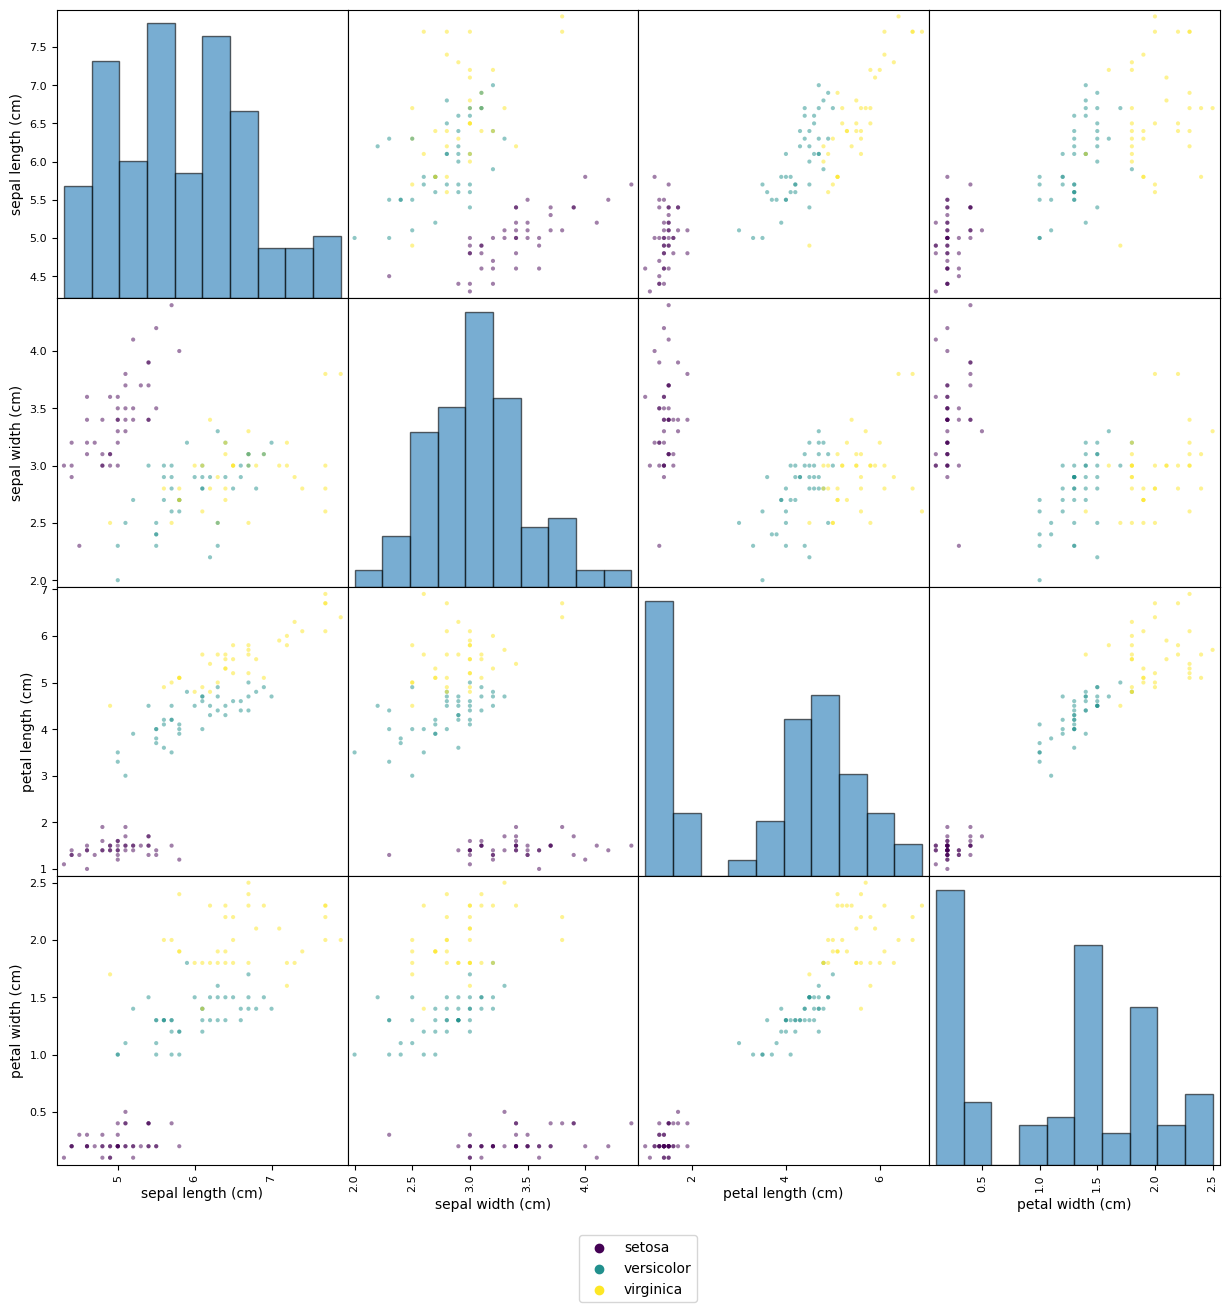

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


df_iris = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(df_iris, figsize=(15, 15), c=y_train, hist_kwds={'edgecolor':'black','alpha':0.6})

# This is needed to add a legend to the plot
handles = [plt.scatter([],[],color=cm.viridis(int(i/2*255))) for i in range(3)]
labels = iris.target_names
plt.legend(handles, labels, loc='lower center',bbox_to_anchor = (-1, -0.5))


## More detail needed

From this plot, it appears as if *setosa* is linearly separable from *versicolor* and *virginica*. To do this, we turn to our friend k-NN:

<div style="background-color: #FFF8C6">

### k-Nearest Neighbours (k-NN)

The k-NN algorithm can be used for both classification and regression. It starts with calculating the distance of a new point $x$ to all other points in the dataset. It then finds the $k$ nearest points closest to $x$ and for:

* **classification** we assign the new data point $x$ to the majority class of its $k$-nearest neighbours. For example, if our goal is to classify cats or dogs and the three nearest data-points ($k=3$) to $x$ are classified as cat, cat, dog, then our new point $x$ would be classified as cat. However, if look at the 10 nearest data points ($k=10$) to $x$ and we find now that 4 are cat and 6 are dog, $x$ would be classified as dog.

![Website_kNN.png](attachment:Website_kNN.png)

*Another example of classification where in the first circle $k=3$, the green object is classified as a triangle, whereas in the second circle $k=5$ it is classified as a square (Source: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)).*


* **regression** we see labels as continuous variables and assign the label of data point $x$ as the mean of the labels of its k-nearest neighbours.

A commonly used distance is the (classic) Euclidean distance
\begin{equation*}
d(\bold{p},\bold{q})=\sqrt{\sum_{i=1}^{D}\left(q_{i}-p_{i}\right)^{2}},
\end{equation*}
where $\bold{p}$ and $\bold{q}$ are two points in our $D$-dimensional Euclidean space. Other distances can be chosen interchangably, depending on the problem at hand. 

A helpful resource for the different types of distances and situations where they are used can be found [here](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 12 #Here we decided to look at the 12 nearest neighbours to classify something
weights = "uniform"
#weights = "distance"
iris_knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)

In [ ]:
iris_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

Now the k-NN has been trained, we can make predictions on the test data:

In [ ]:
pred = iris_knn.predict(X_test)

In [ ]:
#print(pred)
#print(y_test)
agree = 0
disagree = 0
for i in range(len(pred)): #could easily be a lamda function but just to be explicit
    if pred[i] == y_test[i]: #If the prediction matches the outcome add one to the agree integer
        agree = agree +1
    else:
        disagree = disagree +1

print("Agreeing ", agree)
print("Disagreeing ", disagree)
print("Success fraction", agree/(agree+disagree))

Agreeing  29
Disagreeing  1
Success fraction 0.9666666666666667


<div style="background-color: #C2F5DD">

## Exercise One:

Systematically investigate how well a kNN classifier can work with these data (change the number of neighbours, weighting etc) and present the information. 


### Cross Validation

For many ML algorithms, it was traditional to keep iterating on your model until the results you got on your test sample were "good enough" i.e. better than some threshold. However, because your training is tuned depending on performance on the test data, your model is implicitly learning some details of the test data, rather than being independent of the test data. 

To get around this, the idea of cross validation came around. This is where you break down the training set into a number of smaller sets called *folds*. You then train your model with all but one of these folds and evaluate with remaining fold. This way you get an array of evaluations (which we will meet this later on in this notebook) to validate individual attempts at training a model. Your test data can (and should) be kept to one side for final evaluation after you have finished optimising your model training.

<div style="background-color: #FFF8C6">

### $T$-fold Cross-Validation

This is when we **split our data** into **training-validation** sets $T$-times (sometimes can be called $k$-fold Cross-Validation, but we have used a $T$ to avoid confusion with k-NN) to **reduce the risk of overfitting** to the full training data or to parts of the training data.

Mathematically, the procedure is as follows. We split the data $\mathcal{S}=\{\mathbf{x}^{(i)}, y^{(i)}\}$ for $i=1,...,N$ equally sized subsets $\mathcal{S_{t}}$ such that
\begin{equation*}
\mathcal{S}=\bigcup_{t=1}^{T}\mathcal{S}_{t} \; \text{and} \; |\mathcal{S}_{t}|=\frac{|\mathcal{S}|}{T},
\end{equation*}
where $|\mathcal{S_{m}}|$ is the size of the $mth$ subset. We set aside one of the subsets and train the model on the rest of the samples i.e. $\overline{\mathcal{S_{t}}}=\mathcal{S}-\mathcal{S_{t}}$. We learn a model $\hat{f}_{\overline{\mathcal{S_{t}}}}$, which we use to predict $\mathcal{S_{t}}$. We then compute an error measure for the prediction on $\mathcal{S_{t}}$ (for example the mean square error MSE):
\begin{equation*}
\text{MSE}_{t}=\sum_{i \in \mathcal{S_{t}}}\left[\hat{f}_{\overline{\mathcal{S_{t}}}}(\mathbf{x}^{(i)})-y^{(i)} \right]^2.
\end{equation*}

The same process is done in turn for each pf the subsets of our split $S_{t}$,$t=1,..,T$ in each case obtaining a different model for their corresponding complement. 

We then compute the average MSE overall $T$-folds:
\begin{equation*}
\langle\text{MSE}\rangle=\frac{1}{T}\sum_{t=1}^{T}\text{MSE}_t.
\end{equation*}

This average MSE is then a measure of how well the model predicts *out-of-sample*. 

**Choosing number of folds $T$:** It seems clear that the way in which we split the data into training and validation, and the balance between both sets, will effect the results of the cross-validation. The extreme case is $T=N$, which is called *leave-one-out* cross-validation (LOO-CV). This tests how well each sample can be predicted from the rest of the samples. However this is computationally expensive and **not necessary**.

In practice, the number of folds $T$ is chosen based on the size of the data and the amount of computing power available (larger $T$ means more models need fitting). Typically $T=5$ is used for a smaller dataset and $T=10$ for larger ones, so that one does out-of-sample prediction on validation sets that contain around $10%$ od the data

More information can be found [here](https://machinelearningmastery.com/k-fold-cross-validation/).